In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import datetime as dt
from datetime import timedelta
import json
import os
import csv
import matplotlib.pyplot as plt


In [2]:
localdir=os.getcwd()
# localdir

In [3]:
localdir

'C:\\Users\\vchiluveru\\Downloads\\VB\\KL\\GRA\\Agents_v2'

In [4]:
folder_list=[folder for folder in os.listdir(localdir) if 'CGPT' in folder]
print(len(folder_list), os.listdir(folder_list[0]))

24 ['2025-02-19-2.log', '2025-02-19-2.log.gz', 'CGPTBase21.json']


In [5]:
# for foldername in folder_list:
#     print(os.listdir(foldername))

In [6]:
player_names_list = ['Alex', 'Cosmo', 'Negan', 'Sokka', 'Steve']

In [7]:
player_profession_dict = {}

for ent in data_load['participants']:
    player_profession_dict[ent['name']] = ent['profession'] 
player_profession_dict

NameError: name 'data_load' is not defined

In [8]:
ACCEPTED = 'ACCEPTED'
DECLINED = 'DECLINED'
CANCELLED = 'CANCELLED'

game_trades_df_dict = {}
game_final_df_dict = {}
game_list = []
gametype_list = []
winner_list = []
score_list = []

player_profession_dict = {}

for folder in folder_list:
    print(folder)
    score_file=[item for item in os.listdir(folder) if '.json' in item][0]
    print(score_file)
    data=open(os.path.join(localdir,folder,score_file), encoding='utf8')
    data_load=json.load(data)
    player_profession_dict[folder] = {}
    for ent in data_load['participants']:
        player_profession_dict[folder][ent['name']] = ent['profession'] 
    trades_df=df.from_records(data_load["trades"])
    for ind in trades_df.index:
        trades_df.loc[ind,"beginTimestamp"]=pd.Timestamp(trades_df.loc[ind,"beginTimestamp"])
        trades_df.loc[ind,"endTimestamp"]=pd.Timestamp(trades_df.loc[ind,"endTimestamp"])
    print(trades_df.shape, folder)
    trades_df = trades_df[(trades_df['status']==ACCEPTED)]
    print(trades_df.shape, folder)
    game_trades_df_dict[folder] = trades_df
    # final_df=df.from_records(data_load['participants'])
    # game_final_df_dict[folder] = final_df
    # winner_list.append(data_load['winner'])
    # game_list.append(folder.split('_')[1])
    # if 'A' in folder.split('_')[1]:
        # gametype_list.append('Competitive')
    # elif 'B' in folder.split('_')[1]:
        # gametype_list.append('Baseline')
    # else:
        # gametype_list.append('Cooperative')
    # score_list.append(data_load['score'])

# winner_df = df({'game':game_list, 'gametype':gametype_list, 'winner':winner_list,'score':score_list})
professions_set = set([player_profession_dict[folder][player] for folder in player_profession_dict for player in player_profession_dict[folder]])

CGPTBase21
CGPTBase21.json
(25, 14) CGPTBase21
(15, 14) CGPTBase21
CGPTBase22
CGPTBase22.json
(43, 14) CGPTBase22
(17, 14) CGPTBase22
CGPTBase23
CGPTBase23.json
(25, 14) CGPTBase23
(14, 14) CGPTBase23
CGPTBase24
CGPTBase24.json
(53, 14) CGPTBase24
(14, 14) CGPTBase24
CGPTBase25
CGPTBase25.json
(31, 14) CGPTBase25
(18, 14) CGPTBase25
CGPTBase26
CGPTBase26.json
(32, 14) CGPTBase26
(21, 14) CGPTBase26
CGPTBase27
CGPTBase27.json
(54, 14) CGPTBase27
(20, 14) CGPTBase27
CGPTBase28
CGPTBase28.json
(28, 14) CGPTBase28
(23, 14) CGPTBase28
CGPTComp21
CGPTComp21.json
(30, 14) CGPTComp21
(19, 14) CGPTComp21
CGPTComp22
CGPTComp22.json
(20, 14) CGPTComp22
(14, 14) CGPTComp22
CGPTComp23
CGPTComp23.json
(49, 14) CGPTComp23
(10, 14) CGPTComp23
CGPTComp24
CGPTComp24.json
(23, 14) CGPTComp24
(8, 14) CGPTComp24
CGPTComp25
CGPTComp25.json
(17, 14) CGPTComp25
(13, 14) CGPTComp25
CGPTComp26
CGPTComp26.json
(20, 14) CGPTComp26
(16, 14) CGPTComp26
CGPTComp27
CGPTComp27.json
(36, 14) CGPTComp27
(12, 14) CGPTCom

In [9]:
# def get_begin_end_scores(r):
#     endscore_dict = r['endScores']
#     beginscore_dict = r['beginScores']
#     requester_beginscore = beginscore_dict['requester']
#     requester_endscore = endscore_dict['requester']
#     requested_beginscore = beginscore_dict['requested']
#     requested_endscore = endscore_dict['requested']
#     requester_scoregain = requester_endscore - requester_beginscore
#     requested_scoregain = requested_endscore - requested_beginscore
#     total_scoregain = requester_scoregain + requested_scoregain
#     print(requester_scoregain, requested_scoregain, total_scoregain)
#     r['scoregain'] = total_scoregain
#     return r

# player_trades_df = game_trades_df_dict[filename]
# player_trades_df = player_trades_df[player_trades_df['status']==ACCEPTED]
# player_trades_df = player_trades_df.apply(get_begin_end_scores, axis=1)
# player_trades_df

In [10]:
'RED_GLAZED_TERRACOTTA'.lower().replace('_',' ')

'red glazed terracotta'

In [11]:
tierItemsValueFile=open('TierITemValues.txt', encoding='utf8')
tierItemsValuelines = tierItemsValueFile.readlines()
tierItemsValueFile.close()

item_names_list = []
item_tier_list = []
item_value_list = []
itemTierValue_dict = {}
profession_items_dict = {profession: [] for profession in professions_set}

for line in tierItemsValuelines:
    # print(line)
    if 'tier1' in line:
        item_name = line.split('ItemStack(Material.')[1].split('));')[0]
        item_name = item_name.lower()
        # item_names_list.append(item_name)
        # item_tier_list.append(1)
        # item_value_list.append(1)
        # print(line)
        profession_name = line.split('tier1')[1].split('.add(')[0]
        profession_items_dict[profession_name].append(item_name)
        if item_name not in itemTierValue_dict:
            itemTierValue_dict[item_name] = {'tier': 1, 'value':1}
    elif 'tier2' in line:
        item_name = line.split('ItemStack(Material.')[1].split('));')[0]
        item_name = item_name.lower()
        # item_names_list.append(item_name)
        # item_tier_list.append(2)
        # item_value_list.append(3)
        # print(line)
        profession_name = line.split('tier2')[1].split('.add(')[0]
        profession_items_dict[profession_name].append(item_name)
        if item_name not in itemTierValue_dict:
            itemTierValue_dict[item_name] = {'tier': 2, 'value':3}
    elif 'tier3' in line:
        item_name = line.split('ItemStack(Material.')[1].split('));')[0]
        item_name = item_name.lower()
        # item_names_list.append(item_name)
        # item_tier_list.append(3)
        # item_value_list.append(10)
        # print(line)
        profession_name = line.split('tier3')[1].split('.add(')[0]
        profession_items_dict[profession_name].append(item_name)
        if item_name not in itemTierValue_dict:
            itemTierValue_dict[item_name] = {'tier': 3, 'value':10}

# itemTierValue_df = df({'item_name':item_names_list, 'tier':item_tier_list, 'value':item_value_list})
print(itemTierValue_dict)
print(profession_items_dict)

{'potato': {'tier': 1, 'value': 1}, 'carrot': {'tier': 1, 'value': 1}, 'wheat': {'tier': 1, 'value': 1}, 'bread': {'tier': 2, 'value': 3}, 'pumpkin': {'tier': 2, 'value': 3}, 'mushroom_stew': {'tier': 3, 'value': 10}, 'cod': {'tier': 1, 'value': 1}, 'salmon': {'tier': 1, 'value': 1}, 'tropical_fish': {'tier': 1, 'value': 1}, 'pufferfish': {'tier': 2, 'value': 3}, 'turtle_egg': {'tier': 2, 'value': 3}, 'oak_boat': {'tier': 3, 'value': 10}, 'beef': {'tier': 1, 'value': 1}, 'chicken': {'tier': 1, 'value': 1}, 'porkchop': {'tier': 1, 'value': 1}, 'cooked_beef': {'tier': 2, 'value': 3}, 'cooked_porkchop': {'tier': 2, 'value': 3}, 'rabbit_stew': {'tier': 3, 'value': 10}, 'iron_ingot': {'tier': 1, 'value': 1}, 'gold_ingot': {'tier': 1, 'value': 1}, 'coal': {'tier': 1, 'value': 1}, 'fletching_table': {'tier': 2, 'value': 3}, 'smithing_table': {'tier': 2, 'value': 3}, 'diamond_sword': {'tier': 3, 'value': 10}, 'leather': {'tier': 1, 'value': 1}, 'stick': {'tier': 1, 'value': 1}, 'lead': {'tier'

In [12]:
def get_trade_value(r):
    request_list = r['request']
    offer_list = r['offer']
    total_trade_value = 0
    for req in request_list:
        item_name = req['resource']
        item_num = req['amount']
        item_name = item_name.lower().replace(' ', '_')
        total_value = itemTierValue_dict[item_name]['value'] * item_num
        total_trade_value += total_value
    for req in offer_list:
        item_name = req['resource']
        item_num = req['amount']
        item_name = item_name.lower().replace(' ', '_')
        total_value = itemTierValue_dict[item_name]['value'] * item_num
        total_trade_value += total_value
    r['trade_value'] = total_trade_value
    if 'Comp' in filename.split('CGPT')[-1]:
        r['game_type'] = 'Competitive'
        r['game_name'] = filename.split('CGPTComp2')[-1]
    elif 'Base' in filename.split('CGPT')[-1]:
        r['game_type'] = 'Baseline'
        r['game_name'] = filename.split('CGPTBase2')[-1]
    else:
        r['game_type'] = 'Cooperative'
        r['game_name'] = filename.split('CGPTCoop2')[-1]
    return r


In [13]:
for filename in game_trades_df_dict:
    print(filename)
    trades_df = game_trades_df_dict[filename]
    trades_df = trades_df.apply(get_trade_value, axis=1)
    game_trades_df_dict[filename] = trades_df

CGPTBase21
CGPTBase22
CGPTBase23
CGPTBase24
CGPTBase25
CGPTBase26
CGPTBase27
CGPTBase28
CGPTComp21
CGPTComp22
CGPTComp23
CGPTComp24
CGPTComp25
CGPTComp26
CGPTComp27
CGPTComp28
CGPTCoop21
CGPTCoop22
CGPTCoop23
CGPTCoop24
CGPTCoop25
CGPTCoop26
CGPTCoop27
CGPTCoop28


In [14]:
def get_request_non_useful_items(trades_df, player_names_list, player_profession_dict, profession_items_dict, filename):
    player_profession = {}
    player_useful_items = {}
    for player in player_names_list:
        player_profession[player] = player_profession_dict[filename][player]
        player_useful_items[player] = profession_items_dict[player_profession[player]]
    def row_wise_non_useful(row):
        p1 = row['requester']
        p2 = row['requested']

        request_list = row['request']
        request_items_list = [ent['resource'].lower().replace(' ', '_') for ent in request_list]
        request_non_useful_items_list = [item for item in request_items_list if item not in player_useful_items[p1]]
        offer_list = row['offer']
        offer_items_list = [ent['resource'].lower().replace(' ', '_') for ent in offer_list]
        offer_non_useful_items_list = [item for item in offer_items_list if item not in player_useful_items[p2]]
        row['requester_nonuseful'] = request_non_useful_items_list
        row['requested_nonuseful'] = offer_non_useful_items_list
        return row

    trades_df = trades_df.apply(row_wise_non_useful, axis=1)
    return trades_df



In [15]:
# three_way_trades_dict = {}

# for filename in game_trades_df_dict:
#     print(filename)
#     three_way_trades_dict[filename] = []
#     # three_way_trades_dict[filename] = {}
#     trades_df = game_trades_df_dict[filename]
#     trades_df = get_request_non_useful_items(trades_df, player_names_list, player_profession_dict, profession_items_dict, filename)
    
#     for player in player_names_list:
#         x_df = trades_df[(trades_df['requester']==player) | (trades_df['requested']==player)]

#         for i in range(len(x_df.index)-1):
#             N = len(x_df.index)
#             row = x_df.loc[x_df.index[i], :]
#             p1 = row['requester']
#             p2 = row['requested']
#             if p1 == player:
#                 # check requester_nonuseful
#                 p1_non_useful = row['requester_nonuseful']
#                 # p2_non_useful = row['requested_nonuseful']
#                 if len(p1_non_useful):
#                     # p1 got non-useful items
#                     # when does he trade these items, if at all, after how many trades
#                     for j in np.arange(1, N-i):
#                         row_n1 = x_df.loc[x_df.index[i+j], :]
#                         if row_n1['requester'] == player:
#                             # check offer items
#                             items_n1 = [ent['resource'] for ent in row_n1['offer']]
#                             items_n1 = [ent.lower().replace(' ', '_') for ent in items_n1]
#                             # within items in offer, check if at least 1 item is from previous non_useful
#                             traded_nonuseful_items_list = [item for item in items_n1 if item in p1_non_useful]
#                             if len(traded_nonuseful_items_list):
#                                 # 3-way trade occured
#                                 three_way_trades_dict[filename].append(
#                                     {'player': player, 'trade1': i+1, 'trade2': i+j+1, 'count': j,
#                                      'non_useful_items1': p1_non_useful, 'non_useful_items2': traded_nonuseful_items_list,
#                                      'game_type': row_n1['game_type'],  'game_name': row_n1['game_name'],
#                                      'trade1_ind': x_df.index[i], 'trade2_ind': x_df.index[i+j]})
#                         elif row_n1['requested'] == player:
#                             # check request items
#                             items_n1 = [ent['resource'] for ent in row_n1['request']]
#                             items_n1 = [ent.lower().replace(' ', '_') for ent in items_n1]
#                             # within items in request, check if at least 1 item is from previous non_useful
#                             traded_nonuseful_items_list = [item for item in items_n1 if item in p1_non_useful]
#                             if len(traded_nonuseful_items_list):
#                                 # 3-way trade occured
#                                 three_way_trades_dict[filename].append(
#                                     {'player': player, 'trade1': i+1, 'trade2': i+j+1, 'count': j,
#                                      'non_useful_items1': p1_non_useful, 'non_useful_items2': traded_nonuseful_items_list,
#                                      'game_type': row_n1['game_type'],  'game_name': row_n1['game_name'],
#                                      'trade1_ind': x_df.index[i], 'trade2_ind': x_df.index[i+j]})
                    
#             if p2 == player:
#                 # check requested_nonuseful
#                 # p1_non_useful = row['requester_nonuseful']
#                 p2_non_useful = row['requested_nonuseful']
#                 if len(p2_non_useful):
#                     # p2 got non-useful items
#                     # when does he trade these items, if at all, after how many trades
#                     for j in np.arange(1, N-i):
#                         row_n1 = x_df.loc[x_df.index[i+j], :]
#                         if row_n1['requester'] == player:
#                             # check offer items
#                             items_n1 = [ent['resource'] for ent in row_n1['offer']]
#                             items_n1 = [ent.lower().replace(' ', '_') for ent in items_n1]
#                             # within items in offer, check if at least 1 item is from previous non_useful
#                             traded_nonuseful_items_list = [item for item in items_n1 if item in p2_non_useful]
#                             if len(traded_nonuseful_items_list):
#                                 # 3-way trade occured
#                                 three_way_trades_dict[filename].append(
#                                     {'player': player, 'trade1': i+1, 'trade2': i+j+1, 'count': j,
#                                      'non_useful_items1': p2_non_useful, 'non_useful_items2': traded_nonuseful_items_list,
#                                      'game_type': row_n1['game_type'],  'game_name': row_n1['game_name'],
#                                      'trade1_ind': x_df.index[i], 'trade2_ind': x_df.index[i+j]})
#                         elif row_n1['requested'] == player:
#                             # check request items
#                             items_n1 = [ent['resource'] for ent in row_n1['request']]
#                             items_n1 = [ent.lower().replace(' ', '_') for ent in items_n1]
#                             # within items in request, check if at least 1 item is from previous non_useful
#                             traded_nonuseful_items_list = [item for item in items_n1 if item in p2_non_useful]
#                             if len(traded_nonuseful_items_list):
#                                 # 3-way trade occured
#                                 three_way_trades_dict[filename].append(
#                                     {'player': player, 'trade1': i+1, 'trade2': i+j+1, 'count': j,
#                                      'non_useful_items1': p2_non_useful, 'non_useful_items2': traded_nonuseful_items_list,
#                                      'game_type': row_n1['game_type'],  'game_name': row_n1['game_name'],
#                                      'trade1_ind': x_df.index[i], 'trade2_ind': x_df.index[i+j]})


In [16]:
three_way_trades_dict = {}

for filename in game_trades_df_dict:
    print(filename)
    three_way_trades_dict[filename] = []
    # three_way_trades_dict[filename] = {}
    trades_df = game_trades_df_dict[filename]
    trades_df = get_request_non_useful_items(trades_df, player_names_list, player_profession_dict, profession_items_dict, filename)
    
    for player in player_names_list:
        x_df = trades_df[(trades_df['requester']==player) | (trades_df['requested']==player)]
        print(player)

        for i in range(len(x_df.index)-1):
            N = len(x_df.index)
            row = x_df.loc[x_df.index[i], :]
            p1 = row['requester']
            p2 = row['requested']
            if p1 == player:
                # check requester_nonuseful
                p1_non_useful = row['requester_nonuseful']
                # p2_non_useful = row['requested_nonuseful']
                if len(p1_non_useful):
                    # p1 got non-useful items
                    # when does he trade these items, if at all, after how many trades
                    for j in np.arange(1, N-i):
                        row_n1 = x_df.loc[x_df.index[i+j], :]
                        items_n1_request = []
                        items_n1_request_amt = []
                        items_n1_request_dict = {}
                        received_useful_items_list = []
                        if row_n1['requester'] == player:
                            # check offer items
                            items_n1 = [ent['resource'] for ent in row_n1['offer']]
                            items_n1 = [ent.lower().replace(' ', '_') for ent in items_n1]
                            # within items in offer, check if at least 1 item is from previous non_useful
                            traded_nonuseful_items_list = [item for item in items_n1 if item in p1_non_useful]
                            if len(traded_nonuseful_items_list):
                                # 3-way trade occured
                                # check if the item received is useful for player too
                                # check request items
                                items_n1_request = [ent['resource'] for ent in row_n1['request']]
                                items_n1_request = [ent.lower().replace(' ', '_') for ent in items_n1_request]
                                items_n1_request_amt = [ent['amount'] for ent in row_n1['request']]
                                items_n1_request_dict = {item: amt for item, amt in zip(
                                    items_n1_request, items_n1_request_amt)}
                                player_profession = player_profession_dict[filename][player]
                                player_useful_items = profession_items_dict[player_profession]
                                received_useful_items_list = [item for item in items_n1_request if item in player_useful_items]
                                print(items_n1_request_dict)
                                print(player_useful_items)
                                print('j = ', j, 'received_useful_items: ', received_useful_items_list)
                                if len(received_useful_items_list):
                                    score_gain = 0
                                    for item in received_useful_items_list:
                                        if item in itemTierValue_dict:
                                            score_gain += (items_n1_request_dict[item]*itemTierValue_dict[item]['value'])
                                        else:
                                            # unable to find this item in the tier value directory
                                            print('unable to find tier value for item: ', item)
                                    print('3-WAY TRADE! ', i, j)
                                    three_way_trades_dict[filename].append(
                                        {'player': player, 'trade1': i+1, 'trade2': i+j+1, 'count': j,
                                         'non_useful_items1': p1_non_useful, 'non_useful_items2': traded_nonuseful_items_list,
                                         'received_useful_items': items_n1_request_dict, 'score_gain': score_gain,
                                         'game_type': row_n1['game_type'],  'game_name': row_n1['game_name'],
                                         'trade1_ind': x_df.index[i], 'trade2_ind': x_df.index[i+j]})
                        elif row_n1['requested'] == player:
                            # check request items
                            items_n1 = [ent['resource'] for ent in row_n1['request']]
                            items_n1 = [ent.lower().replace(' ', '_') for ent in items_n1]
                            # within items in request, check if at least 1 item is from previous non_useful
                            traded_nonuseful_items_list = [item for item in items_n1 if item in p1_non_useful]
                            if len(traded_nonuseful_items_list):
                                # 3-way trade occured
                                # check if the item received is useful for player too
                                # check request items
                                items_n1_request = [ent['resource'] for ent in row_n1['offer']]
                                items_n1_request = [ent.lower().replace(' ', '_') for ent in items_n1_request]
                                items_n1_request_amt = [ent['amount'] for ent in row_n1['offer']]
                                items_n1_request_dict = {item: amt for item, amt in zip(
                                    items_n1_request, items_n1_request_amt)}
                                player_profession = player_profession_dict[filename][player]
                                player_useful_items = profession_items_dict[player_profession]
                                received_useful_items_list = [item for item in items_n1_request if item in player_useful_items]
                                print(items_n1_request_dict)
                                print(player_useful_items)
                                print('j = ', j, 'received_useful_items: ', received_useful_items_list)
                                if len(received_useful_items_list):
                                    score_gain = 0
                                    for item in received_useful_items_list:
                                        if item in itemTierValue_dict:
                                            score_gain += (items_n1_request_dict[item]*itemTierValue_dict[item]['value'])
                                        else:
                                            # unable to find this item in the tier value directory
                                            print('unable to find tier value for item: ', item)
                                    print('3-WAY TRADE! ', i, j)
                                three_way_trades_dict[filename].append(
                                    {'player': player, 'trade1': i+1, 'trade2': i+j+1, 'count': j,
                                     'non_useful_items1': p1_non_useful, 'non_useful_items2': traded_nonuseful_items_list,
                                     'received_useful_items': items_n1_request_dict, 'score_gain': score_gain,
                                     'game_type': row_n1['game_type'],  'game_name': row_n1['game_name'],
                                     'trade1_ind': x_df.index[i], 'trade2_ind': x_df.index[i+j]})
                    
            if p2 == player:
                # check requested_nonuseful
                # p1_non_useful = row['requester_nonuseful']
                p2_non_useful = row['requested_nonuseful']
                if len(p2_non_useful):
                    # p2 got non-useful items
                    # when does he trade these items, if at all, after how many trades
                    for j in np.arange(1, N-i):
                        row_n1 = x_df.loc[x_df.index[i+j], :]
                        items_n1_request = []
                        items_n1_request_amt = []
                        items_n1_request_dict = {}
                        received_useful_items_list = []
                        if row_n1['requester'] == player:
                            # check offer items
                            items_n1 = [ent['resource'] for ent in row_n1['offer']]
                            items_n1 = [ent.lower().replace(' ', '_') for ent in items_n1]
                            # within items in offer, check if at least 1 item is from previous non_useful
                            traded_nonuseful_items_list = [item for item in items_n1 if item in p2_non_useful]
                            if len(traded_nonuseful_items_list):
                                # 3-way trade occured
                                # check if the item received is useful for player too
                                # check request items
                                items_n1_request = [ent['resource'] for ent in row_n1['request']]
                                items_n1_request = [ent.lower().replace(' ', '_') for ent in items_n1_request]
                                items_n1_request_amt = [ent['amount'] for ent in row_n1['request']]
                                items_n1_request_dict = {item: amt for item, amt in zip(
                                    items_n1_request, items_n1_request_amt)}
                                player_profession = player_profession_dict[filename][player]
                                player_useful_items = profession_items_dict[player_profession]
                                received_useful_items_list = [item for item in items_n1_request if item in player_useful_items]
                                print(items_n1_request_dict)
                                print(player_useful_items)
                                print('j = ', j, 'received_useful_items: ', received_useful_items_list)
                                if len(received_useful_items_list):
                                    score_gain = 0
                                    for item in received_useful_items_list:
                                        if item in itemTierValue_dict:
                                            score_gain += (items_n1_request_dict[item]*itemTierValue_dict[item]['value'])
                                        else:
                                            # unable to find this item in the tier value directory
                                            print('unable to find tier value for item: ', item)
                                    print('3-WAY TRADE! ', i,j)
                                    three_way_trades_dict[filename].append(
                                        {'player': player, 'trade1': i+1, 'trade2': i+j+1, 'count': j,
                                         'non_useful_items1': p2_non_useful, 'non_useful_items2': traded_nonuseful_items_list,
                                         'received_useful_items': items_n1_request_dict, 'score_gain': score_gain,
                                         'game_type': row_n1['game_type'],  'game_name': row_n1['game_name'],
                                         'trade1_ind': x_df.index[i], 'trade2_ind': x_df.index[i+j]})
                        elif row_n1['requested'] == player:
                            # check request items
                            items_n1 = [ent['resource'] for ent in row_n1['request']]
                            items_n1 = [ent.lower().replace(' ', '_') for ent in items_n1]
                            # within items in request, check if at least 1 item is from previous non_useful
                            traded_nonuseful_items_list = [item for item in items_n1 if item in p2_non_useful]
                            if len(traded_nonuseful_items_list):
                                # 3-way trade occured
                                # check if the item received is useful for player too
                                # check request items
                                items_n1_request = [ent['resource'] for ent in row_n1['offer']]
                                items_n1_request = [ent.lower().replace(' ', '_') for ent in items_n1_request]
                                items_n1_request_amt = [ent['amount'] for ent in row_n1['offer']]
                                items_n1_request_dict = {item: amt for item, amt in zip(
                                    items_n1_request, items_n1_request_amt)}
                                player_profession = player_profession_dict[filename][player]
                                player_useful_items = profession_items_dict[player_profession]
                                received_useful_items_list = [item for item in items_n1_request if item in player_useful_items]
                                print(items_n1_request_dict)
                                print(player_useful_items)
                                print('j = ', j, 'received_useful_items: ', received_useful_items_list)
                                if len(received_useful_items_list):
                                    score_gain = 0
                                    for item in received_useful_items_list:
                                        if item in itemTierValue_dict:
                                            score_gain += (items_n1_request_dict[item]*itemTierValue_dict[item]['value'])
                                        else:
                                            # use exp.xlsx
                                            if item in tier1_items_list:
                                                score_gain += (items_n1_request_dict[item] * TIER1_VALUE)
                                            elif item in tier2_items_list:
                                                score_gain += (items_n1_request_dict[item] * TIER2_VALUE)
                                            elif item in tier3_items_list:
                                                score_gain += (items_n1_request_dict[item] * TIER3_VALUE)
                                            else:
                                                # unable to find this item in the tier value directory
                                                print('unable to find tier value for item: ', item)
                                    print('3-WAY TRADE! ', i,j)
                                    three_way_trades_dict[filename].append(
                                        {'player': player, 'trade1': i+1, 'trade2': i+j+1, 'count': j,
                                         'non_useful_items1': p2_non_useful, 'non_useful_items2': traded_nonuseful_items_list,
                                         'received_useful_items': items_n1_request_dict, 'score_gain': score_gain,
                                         'game_type': row_n1['game_type'],  'game_name': row_n1['game_name'],
                                         'trade1_ind': x_df.index[i], 'trade2_ind': x_df.index[i+j]})


CGPTBase21
Alex
Cosmo
Negan
Sokka
{'oak_planks': 1}
['cod', 'salmon', 'tropical_fish', 'pufferfish', 'turtle_egg', 'oak_boat']
j =  1 received_useful_items:  []
Steve
CGPTBase22
Alex
Cosmo
Negan
Sokka
{'smithing_table': 2}
['potato', 'carrot', 'wheat', 'bread', 'pumpkin', 'mushroom_stew']
j =  2 received_useful_items:  []
Steve
{'cow_spawn_egg': 2}
['leather', 'stick', 'lead', 'cow_spawn_egg', 'rabbit_hide', 'saddle']
j =  1 received_useful_items:  ['cow_spawn_egg']
3-WAY TRADE!  3 1
CGPTBase23
Alex
{'fletching_table': 1}
['iron_ingot', 'gold_ingot', 'coal', 'fletching_table', 'smithing_table', 'diamond_sword']
j =  1 received_useful_items:  ['fletching_table']
3-WAY TRADE!  4 1
Cosmo
Negan
{'diamond_sword': 1}
['oak_log', 'spruce_log', 'birch_log', 'spruce_planks', 'oak_planks', 'diamond_axe']
j =  1 received_useful_items:  []
{'oak_log': 4}
['oak_log', 'spruce_log', 'birch_log', 'spruce_planks', 'oak_planks', 'diamond_axe']
j =  1 received_useful_items:  ['oak_log']
3-WAY TRADE!  2 1

Alex
Cosmo
{'spruce_planks': 8}
['oak_log', 'spruce_log', 'birch_log', 'spruce_planks', 'oak_planks', 'diamond_axe']
j =  4 received_useful_items:  ['spruce_planks']
3-WAY TRADE!  0 4
Negan
Sokka
Steve
{'string': 1}
['string', 'white_wool', 'blue_dye', 'sheep_spawn_egg', 'loom', 'shears']
j =  2 received_useful_items:  ['string']
3-WAY TRADE!  0 2
CGPTCoop24
Alex
Cosmo
Negan
{'oak_boat': 1}
['oak_log', 'spruce_log', 'birch_log', 'spruce_planks', 'oak_planks', 'diamond_axe']
j =  2 received_useful_items:  []
{'birch_log': 5}
['oak_log', 'spruce_log', 'birch_log', 'spruce_planks', 'oak_planks', 'diamond_axe']
j =  3 received_useful_items:  ['birch_log']
3-WAY TRADE!  2 3
Sokka
Steve
{'beef': 10}
['potato', 'carrot', 'wheat', 'bread', 'pumpkin', 'mushroom_stew']
j =  2 received_useful_items:  []
{'tropical_fish': 1}
['potato', 'carrot', 'wheat', 'bread', 'pumpkin', 'mushroom_stew']
j =  2 received_useful_items:  []
{'oak_planks': 1}
['potato', 'carrot', 'wheat', 'bread', 'pumpkin', 'mushr

In [17]:
# three_way_trades_dict = {}

# for filename in game_trades_df_dict:
#     print(filename)
#     three_way_trades_dict[filename] = {}
#     trades_df = game_trades_df_dict[filename]
#     trades_df = get_request_non_useful_items(trades_df, player_names_list, player_profession_dict, profession_items_dict, filename)
    
#     for player in player_names_list:
#         three_way_trades_dict[filename][player] = []
#     #     player_profession = player_profession_dict[filename][player]
#     #     player_useful_items = profession_items_dict[player_profession]
#         x_df = trades_df[(trades_df['requester']==player) | (trades_df['requested']==player)]
#         # each player participated accepted trades
#     #     for ind, row in player_trades_df:
#     #         if row['requester'] == player:
#     #             # player is requester, need to check request items
#     #             request_list = row['request']
#     #             request_items_list = [ent['resource'].lower().replace(' ', '_') for ent in request_list]
#     #             request_non_useful_items_list = [item for item in request_items_list if item not in player_useful_items]
#     #             if len(request_non_useful_items_list):
#     #                 flag = 1

#         for i in range(len(x_df.index)-1):
#             row = x_df.loc[x_df.index[i], :]
#             p1 = row['requester']
#             p2 = row['requested']
#             if p1 == player:
#                 # check requester_nonuseful
#                 p1_non_useful = row['requester_nonuseful']
#                 # p2_non_useful = row['requested_nonuseful']
#                 if len(p1_non_useful):
#                     # p1 got non-useful items
#                     # does he trade these items in the next 2 trades
#                     row_n1 = x_df.loc[x_df.index[i+1], :]
#                     if row_n1['requester'] == player:
#                         # check offer items
#                         items_n1 = [ent['resource'] for ent in row_n1['offer']]
#                         items_n1 = [ent.lower().replace(' ', '_') for ent in items_n1]
#                         # within items in offer, check if at least 1 item is from previous non_useful
#                         traded_nonuseful_items_list = [item for item in items_n1 if item in p1_non_useful]
#                         if len(traded_nonuseful_items_list):
#                             # 3-way trade occured
#                             three_way_trades_dict[filename][player].append({'trade1': x_df.index[i], 'trade2': x_df.index[i+1]})
#                     elif row_n1['requested'] == player:
#                         # check request items
#                         items_n1 = [ent['resource'] for ent in row_n1['request']]
#                         items_n1 = [ent.lower().replace(' ', '_') for ent in items_n1]
#                         # within items in request, check if at least 1 item is from previous non_useful
#                         traded_nonuseful_items_list = [item for item in items_n1 if item in p1_non_useful]
#                         if len(traded_nonuseful_items_list):
#                             # 3-way trade occured
#                             three_way_trades_dict[filename][player].append({'trade1': x_df.index[i], 'trade2': x_df.index[i+1]})
                        
#                     if i != len(x_df.index)-2:
#                         row_n2 = x_df.loc[x_df.index[i+2], :]
#                         if row_n2['requester'] == player:
#                             # check offer items
#                             items_n2 = [ent['resource'] for ent in row_n2['offer']]
#                             items_n2 = [ent.lower().replace(' ', '_') for ent in items_n2]
#                             # within items in offer, check if at least 1 item is from previous non_useful
#                             traded_nonuseful_items_list = [item for item in items_n2 if item in p1_non_useful]
#                             if len(traded_nonuseful_items_list):
#                                 # 3-way trade occured
#                                 three_way_trades_dict[filename][player].append({'trade1': x_df.index[i], 'trade2': x_df.index[i+2]})
#                         elif row_n2['requested'] == player:
#                             # check request items
#                             items_n2 = [ent['resource'] for ent in row_n2['request']]
#                             items_n2 = [ent.lower().replace(' ', '_') for ent in items_n2]
#                             # within items in request, check if at least 1 item is from previous non_useful
#                             traded_nonuseful_items_list = [item for item in items_n2 if item in p1_non_useful]
#                             if len(traded_nonuseful_items_list):
#                                 # 3-way trade occured
#                                 three_way_trades_dict[filename][player].append({'trade1': x_df.index[i], 'trade2': x_df.index[i+2]})
#             if p2 == player:
#                 # check requested_nonuseful
#                 # p1_non_useful = row['requester_nonuseful']
#                 p2_non_useful = row['requested_nonuseful']
#                 if len(p2_non_useful):
#                     # p2 got non-useful items
#                     # does he trade these items in the next 2 trades
#                     row_n1 = x_df.loc[x_df.index[i+1], :]
#                     if row_n1['requester'] == player:
#                         # check offer items
#                         items_n1 = [ent['resource'] for ent in row_n1['offer']]
#                         items_n1 = [ent.lower().replace(' ', '_') for ent in items_n1]
#                         # within items in offer, check if at least 1 item is from previous non_useful
#                         traded_nonuseful_items_list = [item for item in items_n1 if item in p2_non_useful]
#                         if len(traded_nonuseful_items_list):
#                             # 3-way trade occured
#                             three_way_trades_dict[filename][player].append({'trade1': x_df.index[i], 'trade2': x_df.index[i+1]})
#                     elif row_n1['requested'] == player:
#                         # check request items
#                         items_n1 = [ent['resource'] for ent in row_n1['request']]
#                         items_n1 = [ent.lower().replace(' ', '_') for ent in items_n1]
#                         # within items in request, check if at least 1 item is from previous non_useful
#                         traded_nonuseful_items_list = [item for item in items_n1 if item in p2_non_useful]
#                         if len(traded_nonuseful_items_list):
#                             # 3-way trade occured
#                             three_way_trades_dict[filename][player].append({'trade1': x_df.index[i], 'trade2': x_df.index[i+1]})
                        
#                     if i != len(x_df.index)-2:
#                         row_n2 = x_df.loc[x_df.index[i+2], :]
#                         if row_n2['requester'] == player:
#                             # check offer items
#                             items_n2 = [ent['resource'] for ent in row_n2['offer']]
#                             items_n2 = [ent.lower().replace(' ', '_') for ent in items_n2]
#                             # within items in offer, check if at least 1 item is from previous non_useful
#                             traded_nonuseful_items_list = [item for item in items_n2 if item in p2_non_useful]
#                             if len(traded_nonuseful_items_list):
#                                 # 3-way trade occured
#                                 three_way_trades_dict[filename][player].append({'trade1': x_df.index[i], 'trade2': x_df.index[i+2]})
#                         elif row_n2['requested'] == player:
#                             # check request items
#                             items_n2 = [ent['resource'] for ent in row_n2['request']]
#                             items_n2 = [ent.lower().replace(' ', '_') for ent in items_n2]
#                             # within items in request, check if at least 1 item is from previous non_useful
#                             traded_nonuseful_items_list = [item for item in items_n2 if item in p2_non_useful]
#                             if len(traded_nonuseful_items_list):
#                                 # 3-way trade occured
#                                 three_way_trades_dict[filename][player].append({'trade1': x_df.index[i], 'trade2': x_df.index[i+2]})
                            

In [18]:
three_way_trades_dict

{'CGPTBase21': [],
 'CGPTBase22': [{'player': 'Steve',
   'trade1': 4,
   'trade2': 5,
   'count': 1,
   'non_useful_items1': ['gold_ingot'],
   'non_useful_items2': ['gold_ingot'],
   'received_useful_items': {'cow_spawn_egg': 2},
   'score_gain': 6,
   'game_type': 'Baseline',
   'game_name': '2',
   'trade1_ind': 22,
   'trade2_ind': 24}],
 'CGPTBase23': [{'player': 'Alex',
   'trade1': 5,
   'trade2': 6,
   'count': 1,
   'non_useful_items1': ['quartz_block'],
   'non_useful_items2': ['quartz_block'],
   'received_useful_items': {'fletching_table': 1},
   'score_gain': 3,
   'game_type': 'Baseline',
   'game_name': '3',
   'trade1_ind': 20,
   'trade2_ind': 21},
  {'player': 'Negan',
   'trade1': 3,
   'trade2': 4,
   'count': 1,
   'non_useful_items1': ['diamond_sword'],
   'non_useful_items2': ['diamond_sword'],
   'received_useful_items': {'oak_log': 4},
   'score_gain': 4,
   'game_type': 'Baseline',
   'game_name': '3',
   'trade1_ind': 14,
   'trade2_ind': 17},
  {'player': '

In [19]:
three_way_trades_df_dict = {filename: df.from_records(three_way_trades_dict[filename]) for filename in three_way_trades_dict if three_way_trades_dict[filename] != []}
three_way_trades_df_dict.keys()

dict_keys(['CGPTBase22', 'CGPTBase23', 'CGPTBase25', 'CGPTBase26', 'CGPTBase27', 'CGPTBase28', 'CGPTComp21', 'CGPTComp25', 'CGPTComp26', 'CGPTCoop21', 'CGPTCoop22', 'CGPTCoop23', 'CGPTCoop24', 'CGPTCoop26', 'CGPTCoop28'])

In [20]:
master_three_way_trades_df = df(columns=three_way_trades_df_dict[filename].columns)
print(master_three_way_trades_df.shape)
for filename in three_way_trades_df_dict:
    master_three_way_trades_df = pd.concat([master_three_way_trades_df, three_way_trades_df_dict[filename]])
    print(filename, three_way_trades_df_dict[filename].shape, master_three_way_trades_df.shape)    
master_three_way_trades_df

(0, 12)
CGPTBase22 (1, 12) (1, 12)
CGPTBase23 (4, 12) (5, 12)
CGPTBase25 (6, 12) (11, 12)
CGPTBase26 (6, 12) (17, 12)
CGPTBase27 (5, 12) (22, 12)
CGPTBase28 (4, 12) (26, 12)
CGPTComp21 (1, 12) (27, 12)
CGPTComp25 (1, 12) (28, 12)
CGPTComp26 (1, 12) (29, 12)
CGPTCoop21 (4, 12) (33, 12)
CGPTCoop22 (3, 12) (36, 12)
CGPTCoop23 (2, 12) (38, 12)
CGPTCoop24 (1, 12) (39, 12)
CGPTCoop26 (1, 12) (40, 12)
CGPTCoop28 (5, 12) (45, 12)


,player,trade1,trade2,count,non_useful_items1,non_useful_items2,received_useful_items,score_gain,game_type,game_name,trade1_ind,trade2_ind
0,Steve,4,5,1,[gold_ingot],[gold_ingot],{'cow_spawn_egg': 2},6,Baseline,2,22,24
0,Alex,5,6,1,[quartz_block],[quartz_block],{'fletching_table': 1},3,Baseline,3,20,21
1,Negan,3,4,1,[diamond_sword],[diamond_sword],{'oak_log': 4},4,Baseline,3,14,17
2,Steve,2,5,3,[fletching_table],[fletching_table],{'quartz_block': 1},1,Baseline,3,14,21
3,Steve,2,7,5,[fletching_table],[fletching_table],{'red_glazed_terracotta': 9},27,Baseline,3,14,23
0,Alex,5,6,1,[cooked_beef],[cooked_beef],{'spruce_planks': 3},9,Baseline,5,16,20
1,Negan,5,6,1,"[sheep_spawn_egg, cooked_beef]",[cooked_beef],{'wheat': 7},7,Baseline,5,13,16
2,Sokka,1,2,1,[sheep_spawn_egg],[sheep_spawn_egg],"{'leather': 8, 'stick': 3, 'lead': 3}",14,Baseline,5,9,13
3,Steve,4,7,3,[cow_spawn_egg],[cow_spawn_egg],{'loom': 1},3,Baseline,5,11,24
4,Steve,4,9,5,[cow_spawn_egg],[cow_spawn_egg],{'saddle': 1},3,Baseline,5,11,29


In [21]:
# master_three_way_trades_df.to_excel('Agents-ArbitrageTrades-Counter-df_v2.xlsx')

<AxesSubplot:>

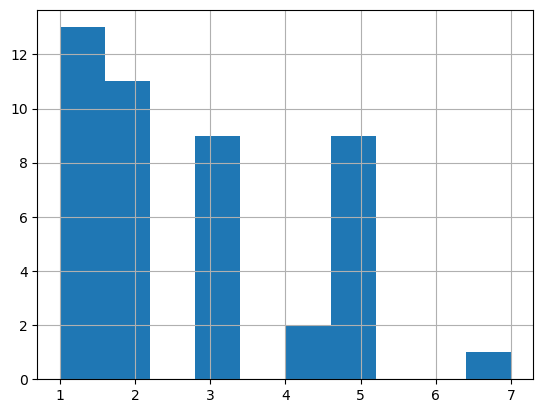

In [22]:
master_three_way_trades_df['count'].hist()

In [23]:
master_three_way_trades_df['count'].mean(), master_three_way_trades_df['count'].median()

(2.7111111111111112, 2.0)

#### HOARDING TASK 2

In [67]:
hoarded_items_dict = {}

for filename in game_trades_df_dict:
    print(filename)
    hoarded_items_dict[filename] = []
    # three_way_trades_dict[filename] = []
    trades_df = game_trades_df_dict[filename]
    player_names_list = list(set(player_profession_dict[filename].keys()))
    trades_df = get_request_non_useful_items(trades_df, player_names_list, player_profession_dict, profession_items_dict, filename)
    # print(trades_df.columns)

    if ('requestedInventory' not in trades_df.columns) or ('requestedInventory' not in trades_df.columns):
        print('no requestedInventory/requesterInventory')
        continue
        
    for player in player_names_list:
        player_profession = player_profession_dict[filename][player]
        player_useful_items = profession_items_dict[player_profession]
        x_df = trades_df[(trades_df['requester']==player) | (trades_df['requested']==player)]
        print(player)
        row1 = x_df.iloc[0, :]
        p1 = row1['requester']
        p2 = row1['requested']
        if p1 == player:
            # first trade as requester, check requesterInventory
            player_inventory1 = row1['requesterInventory']
        else:
            # first trade as requested, check requestedInventory
            player_inventory1 = row1['requestedInventory']
        
        row2 = x_df.iloc[-1,:]
        p1 = row2['requester']
        p2 = row2['requested']
        if p1 == player:
            # first trade as requester, check requesterInventory
            player_inventory2 = row2['requesterInventory']
        else:
            # first trade as requested, check requestedInventory
            player_inventory2 = row2['requestedInventory']

        player_start_inventory_dict = {}
        for ent in player_inventory1:
            if ent['resource'] not in player_start_inventory_dict:
                player_start_inventory_dict[ent['resource'].lower().replace(' ', '_')] = 0
            player_start_inventory_dict[ent['resource'].lower().replace(' ', '_')] += ent['amount']

        player_end_inventory_dict = {}
        for ent in player_inventory2:
            if ent['resource'] not in player_end_inventory_dict:
                player_end_inventory_dict[ent['resource'].lower().replace(' ', '_')] = 0
            player_end_inventory_dict[ent['resource'].lower().replace(' ', '_')] += ent['amount']

        total_items_list = list(set(player_start_inventory_dict.keys()) | set(player_end_inventory_dict.keys()))
        total_items_list = [item.lower().replace(' ', '_') for item in total_items_list]
        nonuseful_items_list = [item for item in total_items_list if item not in player_useful_items]
        nonuseful_items_list = [item for item in nonuseful_items_list if (
            item in itemTierValue_dict)]
        print('nonuseful_items = ', nonuseful_items_list)

#         num_trades = 0
#         for ind, row in x_df.iterrows():
#             p1 = row['requester']
#             p2 = row['requested']
#             if p1 == player:
#                 # first trade as requester, check requesterInventory
#                 player_nonuseful = row['requester_nonuseful']
#                 player_receiving_items_dict = {ent['resource'].lower().replace(' ', '_'): ent['amount'] for ent in row['request']}
#                 player_receiving_items_list = [ent['resource'].lower().replace(' ', '_') for ent in row['request']]
#                 print(ind, player_nonuseful, player_receiving_items_dict)
#             if p2 == player:
#                 # first trade as requester, check requesterInventory
#                 player_nonuseful = row['requested_nonuseful']
#                 player_receiving_items_dict = {ent['resource'].lower().replace(' ', '_'): ent['amount'] for ent in row['offer']}
#                 player_receiving_items_list = [ent['resource'].lower().replace(' ', '_') for ent in row['offer']]
#                 print(ind, player_nonuseful, player_receiving_items_dict)
#             if player_nonuseful != []:
#                 # some nonuseful item in trade
#                 hoarding_list = [item for item in player_nonuseful if item in nonuseful_items_list]
#                 if hoarding_list != []:
#                     # hoarding exists, add this trade into count
#                     print('hoarding_list: ', hoarding_list)
#                     if set(player_nonuseful) == set(player_receiving_items_list):
#                         num_trades += 1        
        
        hoarded_items_list = []
        hoarded_score = 0
        for item in nonuseful_items_list:
            dct = {}
            # print(item in 
            if item in player_end_inventory_dict:
                print(item, ' end ', player_end_inventory_dict[item])
                if item not in dct:
                    dct = {item: 0}
                dct[item] += player_end_inventory_dict[item]
                if item in player_start_inventory_dict:
                    dct[item] -= player_start_inventory_dict[item]
                    print(item, ' start ', player_start_inventory_dict[item])    
                if dct[item] > 0:
                    if item in itemTierValue_dict:
                        hoarded_score += (dct[item]*itemTierValue_dict[item]['value'])
                    else:
                        # use exp.xlsx
                        if item in tier1_items_list:
                            hoarded_score += (dct[item] * TIER1_VALUE)
                        elif item in tier2_items_list:
                            hoarded_score += (dct[item] * TIER2_VALUE)
                        elif item in tier3_items_list:
                            hoarded_score += (dct[item] * TIER3_VALUE)
                        else:
                            # unable to find this item in the tier value directory
                            print('unable to find tier value for item: ', item)
                if dct[item] > 0:
                    hoarded_items_list.append(dct)
        num_trades = 0
        hoarded_score_2 = 0
        ls = [list(ent.keys())[0] for ent in hoarded_items_list]
        hoarded_items_list_2 = {}
        for ind, row in x_df.iterrows():
            p1 = row['requester']
            p2 = row['requested']
            if p1 == player:
                # first trade as requester, check requesterInventory
                player_nonuseful = row['requester_nonuseful']
                player_receiving_items_dict = {ent['resource'].lower().replace(' ', '_'): ent['amount'] for ent in row['request']}
                player_receiving_items_list = [ent['resource'].lower().replace(' ', '_') for ent in row['request']]
                print(ind, player_nonuseful, player_receiving_items_dict)
            if p2 == player:
                # first trade as requester, check requesterInventory
                player_nonuseful = row['requested_nonuseful']
                player_receiving_items_dict = {ent['resource'].lower().replace(' ', '_'): ent['amount'] for ent in row['offer']}
                player_receiving_items_list = [ent['resource'].lower().replace(' ', '_') for ent in row['offer']]
                print(ind, player_nonuseful, player_receiving_items_dict)
            if player_nonuseful != []:
                # some nonuseful item in trade
                hoarding_list = [item for item in player_nonuseful if item in ls]
                if hoarding_list != []:
                    # hoarding exists, add this trade into count
                    print('hoarding_list: ', hoarding_list)
                    if set(player_nonuseful) == set(player_receiving_items_list):
                        num_trades += 1
                        print('num_trades = ', num_trades)
                        for item in player_receiving_items_dict:
                            if item not in hoarded_items_list_2:
                                hoarded_items_list_2[item] = 0                                
                            if item in itemTierValue_dict:
                                hoarded_score_2 += (player_receiving_items_dict[item]*itemTierValue_dict[item]['value'])
                                hoarded_items_list_2[item] += player_receiving_items_dict[item]
                            else:
                                # use exp.xlsx
                                if item in tier1_items_list:
                                    hoarded_score_2 += (player_receiving_items_dict[item] * TIER1_VALUE)
                                    hoarded_items_list_2[item] += player_receiving_items_dict[item]
                                elif item in tier2_items_list:
                                    hoarded_score_2 += (player_receiving_items_dict[item] * TIER2_VALUE)
                                    hoarded_items_list_2[item] += player_receiving_items_dict[item]
                                elif item in tier3_items_list:
                                    hoarded_score_2 += (dct[item] * TIER3_VALUE)
                                    hoarded_items_list_2[item] += player_receiving_items_dict[item]
                                else:
                                    # unable to find this item in the tier value directory
                                    print('unable to find tier value for item: ', item)
        if hoarded_score_2 < hoarded_score:
            hoarded_score = hoarded_score_2
            hoarded_items_list = hoarded_items_list_2

        if hoarded_score != 0:
            hoarded_items_dict[filename].append(
                {'player': player, 'items_list': hoarded_items_list, 'hoarded_score': hoarded_score,
                 'num_trades': num_trades, 'game_type': row1['game_type'],  'game_name': row1['game_name']})


CGPTBase21
Cosmo
nonuseful_items =  ['quartz_block', 'bread', 'stone', 'blue_glazed_terracotta', 'oak_boat', 'rabbit_hide', 'lead', 'mushroom_stew', 'cow_spawn_egg', 'leather', 'glass', 'potato', 'pufferfish', 'tropical_fish', 'stone_pickaxe']
quartz_block  end  2
quartz_block  start  2
stone  end  16
stone  start  16
oak_boat  end  1
oak_boat  start  1
lead  end  1
mushroom_stew  end  1
mushroom_stew  start  1
cow_spawn_egg  end  2
cow_spawn_egg  start  4
leather  end  4
leather  start  4
potato  end  15
potato  start  15
pufferfish  end  3
pufferfish  start  3
tropical_fish  end  5
tropical_fish  start  5
stone_pickaxe  end  1
stone_pickaxe  start  1
1 [] {'diamond_axe': 1}
4 [] {'spruce_log': 5}
5 [] {'birch_log': 1}
9 [] {'diamond_axe': 1}
16 [] {'oak_planks': 9}
20 [] {'birch_log': 17}
21 ['lead'] {'lead': 1}
hoarding_list:  ['lead']
num_trades =  1
24 [] {'spruce_log': 3}
Alex
nonuseful_items =  ['red_glazed_terracotta', 'stick', 'spruce_planks', 'blue_glazed_terracotta', 'cod', 

Cosmo
nonuseful_items =  ['blue_dye', 'wheat', 'carrot', 'string', 'loom', 'sheep_spawn_egg', 'spruce_planks', 'shears', 'stick', 'oak_planks', 'lead', 'white_wool', 'mushroom_stew', 'cow_spawn_egg', 'leather', 'potato', 'spruce_log']
blue_dye  end  2
blue_dye  start  2
wheat  end  12
carrot  end  19
string  end  1
string  start  1
sheep_spawn_egg  end  4
sheep_spawn_egg  start  6
shears  end  1
shears  start  1
stick  end  6
stick  start  5
lead  end  15
lead  start  6
white_wool  end  2
white_wool  start  2
mushroom_stew  end  1
mushroom_stew  start  1
cow_spawn_egg  end  2
cow_spawn_egg  start  2
leather  end  2
leather  start  1
potato  end  8
potato  start  5
spruce_log  end  5
spruce_log  start  5
2 [] {'beef': 2, 'porkchop': 5, 'cooked_porkchop': 1}
6 [] {'cooked_beef': 1}
8 ['leather', 'stick', 'lead', 'potato', 'carrot', 'wheat'] {'leather': 1, 'stick': 1, 'lead': 9, 'potato': 3, 'carrot': 19, 'wheat': 12}
hoarding_list:  ['leather', 'stick', 'lead', 'potato', 'carrot', 'wheat

Cosmo
nonuseful_items =  ['cooked_porkchop', 'saddle', 'red_glazed_terracotta', 'chicken', 'quartz_block', 'stone', 'blue_glazed_terracotta', 'cod', 'lead', 'glass', 'beef', 'tropical_fish', 'salmon']
cooked_porkchop  end  5
cooked_porkchop  start  5
saddle  end  2
saddle  start  2
quartz_block  end  1
quartz_block  start  1
stone  end  10
stone  start  10
blue_glazed_terracotta  end  1
blue_glazed_terracotta  start  1
cod  end  1
lead  end  1
lead  start  1
glass  end  1
glass  start  1
1 [] {'iron_ingot': 1}
6 [] {'smithing_table': 1, 'gold_ingot': 1}
9 [] {'fletching_table': 1}
13 ['cod'] {'cod': 1}
hoarding_list:  ['cod']
num_trades =  1
16 [] {'gold_ingot': 3}
19 [] {'iron_ingot': 1}
Alex
nonuseful_items =  ['porkchop', 'smithing_table', 'gold_ingot', 'cooked_beef', 'stone', 'rabbit_hide', 'iron_ingot', 'cow_spawn_egg', 'leather', 'glass', 'rabbit_stew', 'fletching_table', 'stone_pickaxe']
porkchop  end  2
porkchop  start  2
smithing_table  end  1
smithing_table  start  1
gold_ing

Cosmo
nonuseful_items =  ['porkchop', 'red_glazed_terracotta', 'chicken', 'cooked_beef', 'stone', 'blue_glazed_terracotta', 'cod', 'oak_boat', 'lead', 'cow_spawn_egg', 'leather', 'glass', 'pufferfish', 'tropical_fish', 'salmon']
porkchop  end  17
porkchop  start  17
chicken  end  3
chicken  start  3
stone  end  1
stone  start  1
blue_glazed_terracotta  end  2
blue_glazed_terracotta  start  2
cod  end  10
cod  start  20
oak_boat  end  1
lead  end  1
pufferfish  end  2
pufferfish  start  1
tropical_fish  end  3
tropical_fish  start  3
salmon  end  1
salmon  start  1
1 ['pufferfish'] {'pufferfish': 1}
hoarding_list:  ['pufferfish']
num_trades =  1
6 ['oak_boat'] {'oak_boat': 1}
hoarding_list:  ['oak_boat']
num_trades =  2
18 ['lead'] {'lead': 1}
hoarding_list:  ['lead']
num_trades =  3
22 [] {'spruce_planks': 9}
28 [] {'diamond_axe': 1}
34 [] {'spruce_log': 5}
Alex
nonuseful_items =  ['cooked_porkchop', 'oak_planks', 'lead', 'cow_spawn_egg', 'leather', 'pufferfish', 'salmon', 'turtle_egg'

Cosmo
nonuseful_items =  ['turtle_egg', 'red_glazed_terracotta', 'chicken', 'blue_glazed_terracotta', 'glass', 'pufferfish', 'beef', 'tropical_fish', 'stone_pickaxe']
red_glazed_terracotta  end  4
red_glazed_terracotta  start  4
chicken  end  6
chicken  start  6
blue_glazed_terracotta  end  10
blue_glazed_terracotta  start  10
glass  end  14
glass  start  9
beef  end  2
beef  start  2
tropical_fish  end  1
tropical_fish  start  1
stone_pickaxe  end  1
stone_pickaxe  start  1
6 ['glass'] {'glass': 5, 'white_wool': 15, 'sheep_spawn_egg': 1}
hoarding_list:  ['glass']
10 [] {'string': 3}
Alex
nonuseful_items =  ['string', 'red_glazed_terracotta', 'sheep_spawn_egg', 'pufferfish', 'stone_pickaxe', 'salmon', 'blue_dye', 'turtle_egg', 'loom', 'oak_boat', 'cod', 'white_wool', 'oak_log', 'diamond_axe']
string  end  1
string  start  1
red_glazed_terracotta  end  1
red_glazed_terracotta  start  1
sheep_spawn_egg  end  6
sheep_spawn_egg  start  6
pufferfish  end  1
pufferfish  start  1
stone_pickax

In [63]:
hoarded_items_dict

{'CGPTBase21': [{'player': 'Cosmo',
   'items_list': [{'lead': 1}],
   'hoarded_score': 1,
   'num_trades': 1,
   'game_type': 'Baseline',
   'game_name': '1'},
  {'player': 'Alex',
   'items_list': [{'glass': 1}, {'stone_pickaxe': 1}],
   'hoarded_score': 11,
   'num_trades': 1,
   'game_type': 'Baseline',
   'game_name': '1'},
  {'player': 'Sokka',
   'items_list': [{'oak_planks': 1}, {'stone_pickaxe': 1}, {'birch_log': 1}],
   'hoarded_score': 14,
   'num_trades': 3,
   'game_type': 'Baseline',
   'game_name': '1'},
  {'player': 'Steve',
   'items_list': [{'carrot': 1}, {'spruce_planks': 1}],
   'hoarded_score': 4,
   'num_trades': 2,
   'game_type': 'Baseline',
   'game_name': '1'}],
 'CGPTBase22': [{'player': 'Cosmo',
   'items_list': [{'spruce_log': 6}],
   'hoarded_score': 6,
   'num_trades': 1,
   'game_type': 'Baseline',
   'game_name': '2'},
  {'player': 'Sokka',
   'items_list': [{'gold_ingot': 3}],
   'hoarded_score': 3,
   'num_trades': 1,
   'game_type': 'Baseline',
   'g

In [64]:
hoarded_items_df_dict = {filename: df.from_records(hoarded_items_dict[filename]) for filename in hoarded_items_dict if hoarded_items_dict[filename] != []}
hoarded_items_df_dict.keys()

dict_keys(['CGPTBase21', 'CGPTBase22', 'CGPTBase23', 'CGPTBase24', 'CGPTBase25', 'CGPTBase26', 'CGPTBase27', 'CGPTBase28', 'CGPTComp21', 'CGPTComp22', 'CGPTComp23', 'CGPTComp24', 'CGPTComp25', 'CGPTComp26', 'CGPTComp27', 'CGPTComp28', 'CGPTCoop21', 'CGPTCoop22', 'CGPTCoop23', 'CGPTCoop24', 'CGPTCoop25', 'CGPTCoop26', 'CGPTCoop27', 'CGPTCoop28'])

In [65]:
master_hoarded_items_df = df(columns=hoarded_items_df_dict[filename].columns)
print(master_hoarded_items_df.shape)
for filename in hoarded_items_df_dict:
    master_hoarded_items_df = pd.concat([master_hoarded_items_df, hoarded_items_df_dict[filename]])
    print(filename, hoarded_items_df_dict[filename].shape, master_hoarded_items_df.shape)    
master_hoarded_items_df

(0, 6)
CGPTBase21 (4, 6) (4, 6)
CGPTBase22 (3, 6) (7, 6)
CGPTBase23 (2, 6) (9, 6)
CGPTBase24 (4, 6) (13, 6)
CGPTBase25 (4, 6) (17, 6)
CGPTBase26 (4, 6) (21, 6)
CGPTBase27 (3, 6) (24, 6)
CGPTBase28 (5, 6) (29, 6)
CGPTComp21 (3, 6) (32, 6)
CGPTComp22 (2, 6) (34, 6)
CGPTComp23 (3, 6) (37, 6)
CGPTComp24 (3, 6) (40, 6)
CGPTComp25 (4, 6) (44, 6)
CGPTComp26 (4, 6) (48, 6)
CGPTComp27 (2, 6) (50, 6)
CGPTComp28 (4, 6) (54, 6)
CGPTCoop21 (3, 6) (57, 6)
CGPTCoop22 (4, 6) (61, 6)
CGPTCoop23 (4, 6) (65, 6)
CGPTCoop24 (5, 6) (70, 6)
CGPTCoop25 (2, 6) (72, 6)
CGPTCoop26 (3, 6) (75, 6)
CGPTCoop27 (4, 6) (79, 6)
CGPTCoop28 (3, 6) (82, 6)


,player,items_list,hoarded_score,num_trades,game_type,game_name
0,Cosmo,[{'lead': 1}],1,1,Baseline,1
1,Alex,"[{'glass': 1}, {'stone_pickaxe': 1}]",11,1,Baseline,1
2,Sokka,"[{'oak_planks': 1}, {'stone_pickaxe': 1}, {'bi...",14,3,Baseline,1
3,Steve,"[{'carrot': 1}, {'spruce_planks': 1}]",4,2,Baseline,1
0,Cosmo,[{'spruce_log': 6}],6,1,Baseline,2
...,...,...,...,...,...,...
2,Sokka,[{'shears': 1}],10,1,Cooperative,7
3,Negan,[{'iron_ingot': 5}],5,1,Cooperative,7
0,Sokka,"[{'string': 2}, {'blue_dye': 4}, {'white_wool'...",13,2,Cooperative,8
1,Steve,"[{'cooked_beef': 1}, {'cow_spawn_egg': 1}]",6,2,Cooperative,8


In [66]:
master_hoarded_items_df.to_excel('Agents-Hoarding-Items-df_v2_updated.xlsx')

In [15]:
game_trades_df_dict.keys()

dict_keys(['Agents_A10', 'Agents_A3', 'Agents_A4', 'Agents_A5', 'Agents_A6', 'Agents_A7', 'Agents_A8', 'Agents_A9', 'Agents_B10', 'Agents_B3', 'Agents_B4', 'Agents_B5', 'Agents_B6', 'Agents_B7', 'Agents_B8', 'Agents_B9', 'Agents_C1', 'Agents_C2', 'Agents_C3', 'Agents_C4', 'Agents_C5', 'Agents_C6', 'Agents_C7', 'Agents_C8'])

In [ ]:
game_trades_df_dict['']